## Introduction:
Loans are an essential part of our economy.People borrow money from financial institutions all the time, either for starting a business, emergency expenses, vehicle financing, vacation costs, or education costs.

### Problem Statement:
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
loan = pd.read_csv("C:\\Users\\Ope\\Documents\\workable_csv_e\\Loan.csv")
loan.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,...,LP001091,LP001095,LP001097,LP001098,LP001100,LP001106,LP001109,LP001112,LP001114,LP001116
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Female,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,0,3+,0,0,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,No,No
ApplicantIncome,5849,4583,3000,2583,6000,5417,2333,3036,4006,12841,...,4166,3167,4692,3500,12500,2275,1828,3667,4166,3748
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,3369.0,0.0,0.0,1667.0,3000.0,2067.0,1330.0,1459.0,7210.0,1668.0
LoanAmount,NaN,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,201.0,74.0,106.0,114.0,320.0,NaN,100.0,144.0,184.0,110.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,360.0,360.0,360.0,360.0,360.0,NaN,360.0,360.0,360.0


In [3]:
loan.shape

(614, 13)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations:
* There are total 13 columns including target variable, all of them are self explanatory.
* We have missing values in some columns  which we will deal with later.

In [7]:
# checking for cateorical columns 
for column, content in loan.items():
    if not pd.api.types.is_numeric_dtype(content):
            print(column)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [8]:
# checking for numerical columns 
for column, content in loan.items():
    if  pd.api.types.is_numeric_dtype(content):
            print(column)

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


In [9]:
data_cat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
            'Property_Area','Credit_History','Loan_Amount_Term']


numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


## Data Visualization

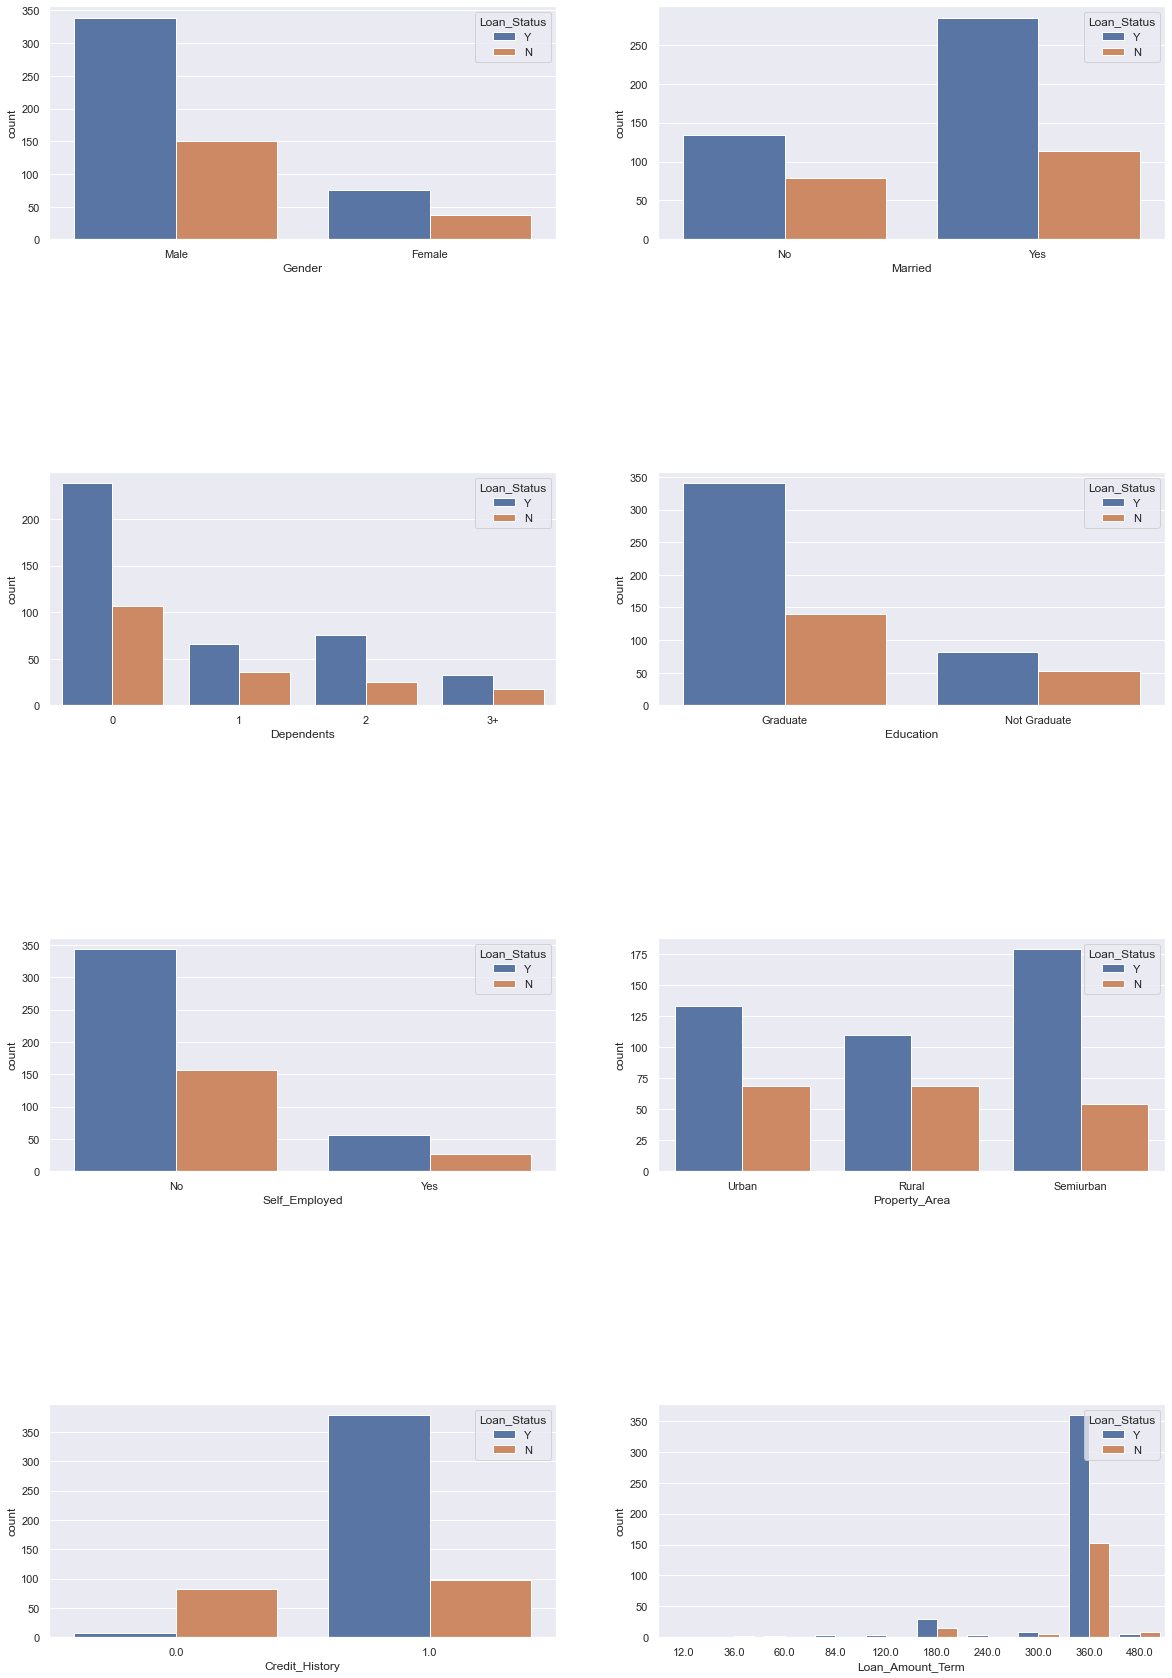

In [10]:
fig, axes = plt.subplots(4,2,figsize=(20,30))
for idx,cat_col in enumerate(data_cat):
    row, col = idx//2, idx%2
    sns.countplot(x = cat_col, data=loan, hue='Loan_Status', ax=axes[row, col])


plt.subplots_adjust(hspace=1)

## These are the things that can be inferred from the plot above:

* Loan Approval Status: About 2/3rd of applicants have been granted loan.

* Sex: There are more Men that seek for loan than Women (approx. 3x)

* Martial Status: About 2/3rd of the population in the dataset is Married; Married applicants are more likely to be granted loans.

* Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

* Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

* Employment: About 5/6th of population is not self employed.

* Property Area: More applicants from Semi-urban are also likely to be granted loans.

* Applicant with credit history are far more likely to be accepted.

* Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


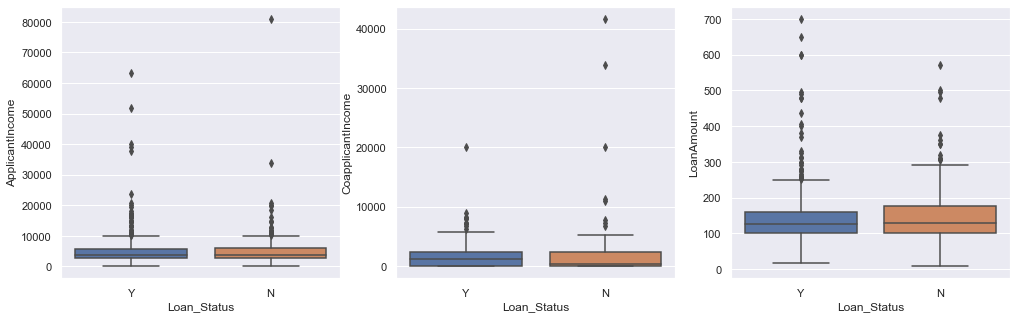

In [11]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y= cat_col, data=loan,x='Loan_Status',ax=axes[idx])

print(loan[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

#loan.replace({'Loan_Status':{'N': 0, 'Y': 1}}, inplace=True)

### Data Preprocessing.

In [12]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

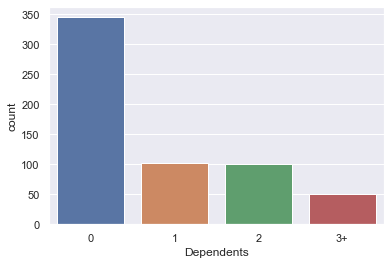

In [13]:
sns.countplot(x = loan.Dependents)

In [14]:
# replacing '3+' with 4
loan = loan.replace(to_replace='3+', value = 4)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

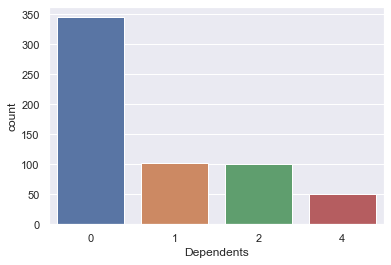

In [15]:
sns.countplot(x = loan.Dependents)

## Input data needs to be pre-processed before we feed it to our model. Following things need to be taken care of:

* Encoding Categorical Features: using `pandas get dummies`
* imputing missing values

In [16]:
#First, I will drop the ID column.
loan = loan.drop('Loan_ID', axis=1)


In [17]:
loan.head(3)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [18]:
#filling with most common class
loan= loan.apply(lambda x: x.fillna(x.value_counts().index[0]))
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
loan.isnull().sum(
)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# This is to convert categorical variables into numerical variables 

loan_encoded = pd.get_dummies(loan,drop_first=True)
loan_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1


## Modelling.

In [21]:
# Splitting the data into inputs and target

inputs = loan_encoded.drop('Loan_Status_Y', axis=1)

y = loan_encoded['Loan_Status_Y']

In [22]:
# Splitting the data into Train -Test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,y,test_size=0.2,stratify =y,random_state =42)



In [23]:
len(X_train), len(y_train), len(y_test)

(491, 491, 123)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

I'll train it (find the patterns) on the training set.

And I'll test it (use the patterns) on the test set.

I will try 3 different machine learning models:

* Decision Tree Classifier
* Support Vector machine
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [24]:
# put the models ina dictionary.

models = {'Logistic Regression': LogisticRegression(max_iter=1000),
         'KNN': KNeighborsClassifier(),
         'RF': RandomForestClassifier(),
         'DT': DecisionTreeClassifier(max_depth=3),
         'SV': SVC()}

# Create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    models : a dict of sklearn model
    X_train :  training data (no label)
    X_test : testing data (no labels)
    y_train: training labels
    y_test : test labels
    """
    
    np.random.seed(42)
    # make a dict to keep model score
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train,y_train)
        #evaluate the models and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
  

In [25]:
model_scores = fit_and_score(models= models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test= X_test,
                            y_test=y_test)


In [26]:
model_scores

{'Logistic Regression': 0.8455284552845529,
 'KNN': 0.6504065040650406,
 'RF': 0.8292682926829268,
 'DT': 0.8455284552845529,
 'SV': 0.6910569105691057}

## Baseline Model Comparison

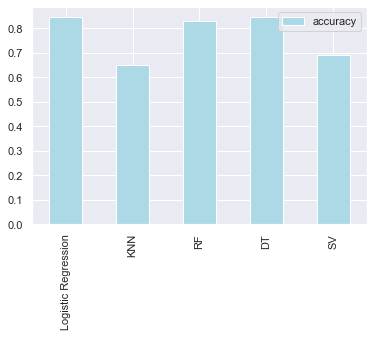

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color ='lightblue');

In [28]:
# KNN tuning
# This is Hypertuning by hand anyway.

train_scores = []
test_scores = []
# create a list of different values for n_neighbors
neighbors = range(1, 21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
     # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
 

Maximum KNN score on the test data: 69.92%


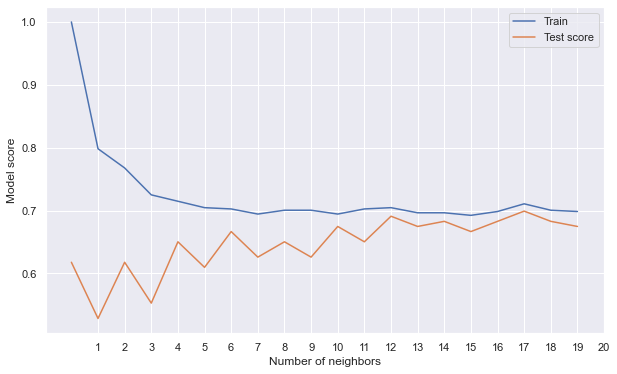

In [29]:
plt.figure(figsize=(10,6))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label= 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')



In [30]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [33]:
log_reg.score(X_test, y_test)

0.8617886178861789

In [34]:
# Tune RandomForest

# setup random seed for result to be reproduceable
np.random.seed(42)

rf_model = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv =5,
                             n_iter=20,
                             verbose=True)
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# Find the best hyperparameters
rf_model.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [36]:
# Evaluate the randomized search RandomForestClassifier model
rf_model.score(X_test, y_test)

0.8536585365853658

### Hyperparamter Tuning with GridSearchCV.

#### LogisticRegression proves to be the best model so far, let's try to improve it with GridsearchCV.

In [37]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-5, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
GS_logR_model = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
GS_logR_model.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
GS_logR_model.best_params_

{'C': 0.22122162910704501, 'solver': 'liblinear'}

In [39]:
print('The Test accuracy:',GS_logR_model.score(X_test, y_test))


The Test accuracy: 0.8617886178861789


### Evaluating our trained machine learning classifier beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* F1-score

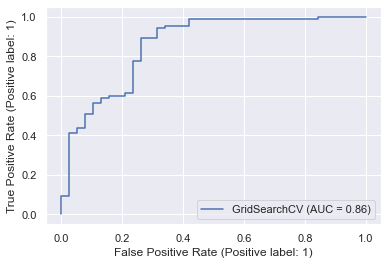

In [40]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(GS_logR_model, X_test, y_test);

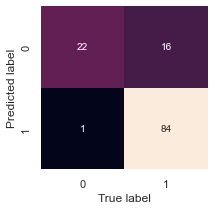

In [41]:
# Make predictions with tuned model
y_preds = GS_logR_model.predict(X_test)

cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm,
            annot=True,
            cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



## Calculate evaluation metrics using cross-validation
#### Here, I will calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so I'll be using `cross_val_score().`

In [49]:
# Check best hyperparameters
GS_logR_model.best_params_

{'C': 0.22122162910704501, 'solver': 'liblinear'}

In [69]:
# Create a final model with best parameters
np.random.seed(42)
model = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [70]:
# Cross-validated accuracy

cv_acc = cross_val_score(model,inputs,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81300813, 0.77235772, 0.7804878 , 0.85365854, 0.81967213])

In [71]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8078368652538984

In [72]:
# Cross-validated rcall
cv_recall = cross_val_score(model,inputs,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall



array([0.98823529, 0.96470588, 0.97619048, 0.98809524, 0.98809524])

In [73]:
cv_recall = np.mean(cv_recall)

In [74]:
# Cross-validated F1
cv_f1= cross_val_score(model,inputs,
                   y,
                        cv=5,
                        scoring='f1')
cv_f1

array([0.87958115, 0.85416667, 0.85863874, 0.90217391, 0.88297872])

In [75]:
cv_f1 = np.mean(cv_f1)

In [76]:
# Cross-validated precision
cv_precision = cross_val_score(model,inputs,
                        y,
                        cv=5,
                        scoring='precision')

In [77]:
cv_precision = np.mean(cv_precision)
cv_precision

0.7906480067278869

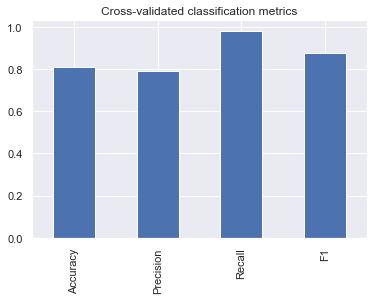

In [78]:
# let's visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[4])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [ ]:
## Feature importance
Feature importance is as asking 'which feature contributed most to the outcome of the model and how did they contribute?'
note: finding feature importance is different foe each ML model

`Like a correlation matrix, feature importance allows you to understand the relationship between the features and the target variable. It also helps you understand what features are irrelevant for the model.`

In [43]:
model = LogisticRegression(C = 0.20433597178569418, 
                          solver='liblinear')

model.fit(X_train, y_train);

In [44]:

model.coef_, model.intercept_

(array([[-8.10671518e-06, -5.73287812e-05, -3.40434915e-04,
         -2.59081242e-03,  1.95352970e+00, -6.95656215e-02,
          3.05904624e-01, -3.53338924e-02, -1.51026100e-01,
          2.09967617e-01, -3.56108866e-01, -7.71975388e-02,
          5.87340590e-01, -4.31459101e-02]]),
 array([0.01672551]))

In [45]:
 # match coef's of feature to columns
    
feature_dict = dict(zip(loan.columns, list (model.coef_[0])))
feature_dict
    

{'Gender': -8.10671517648929e-06,
 'Married': -5.732878122635686e-05,
 'Dependents': -0.00034043491495755474,
 'Education': -0.0025908124175228328,
 'Self_Employed': 1.9535297039306156,
 'ApplicantIncome': -0.06956562153948187,
 'CoapplicantIncome': 0.3059046243262097,
 'LoanAmount': -0.03533389238301484,
 'Loan_Amount_Term': -0.15102610022457333,
 'Credit_History': 0.20996761749178827,
 'Property_Area': -0.3561088661656851,
 'Loan_Status': -0.07719753877889164}

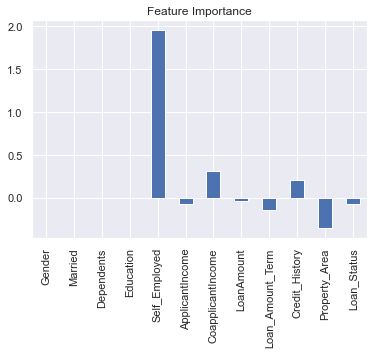

In [46]:
# Visualise feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [47]:
import pickle
# save an existing model to file
pickle.dump(model, open('Loan_prediction.pkl', 'wb'))